In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [0]:
data=pd.concat([train,test],axis=0)

In [0]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [0]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,1.0,1,female,38.0,1,0,71.2833,C85,C
2,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,1.0,1,female,35.0,1,0,53.1000,C123,S
4,0.0,3,male,35.0,0,0,8.0500,NaN,S


In [0]:
data.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [0]:
data.dtypes

Survived    float64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [0]:
data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [0]:
data.shape

(1309, 8)

In [0]:
data.drop(columns=['Cabin'],axis=1,inplace=True)

In [0]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [0]:
data['Age']=data['Age'].astype('int')

In [0]:
data.dropna(inplace=True)

In [0]:
data['Survived']=data['Survived'].astype('int')

In [0]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [0]:
data.shape

(889, 8)

In [0]:
data['Survived']=data['Survived'].map({0:'Dead',1:'Alive'})

In [0]:
data.Survived.value_counts()

Dead     549
Alive    340
Name: Survived, dtype: int64

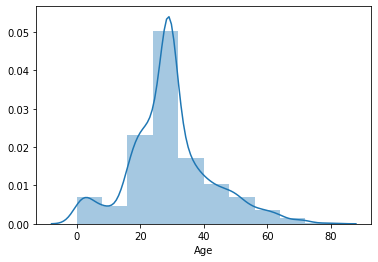

In [0]:
sns.distplot(data['Age'],bins=10,kde=True,hist=True)

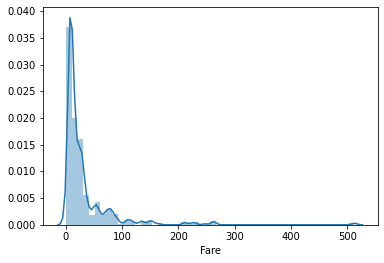

In [0]:
sns.distplot(data['Fare'])

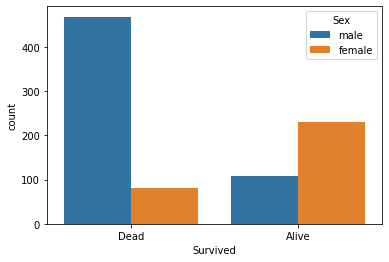

In [0]:
sns.countplot(x='Survived',hue='Sex',data=data)

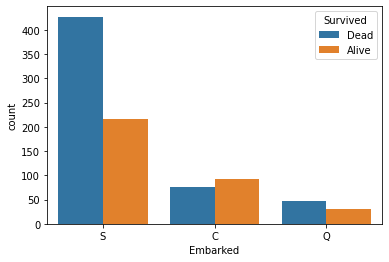

In [0]:
sns.countplot(x='Embarked',hue='Survived',data=data)

In [0]:
data.rename(columns={'SibSp':'no_of_siblings','Parch':'No_of_Parents'},inplace=True)

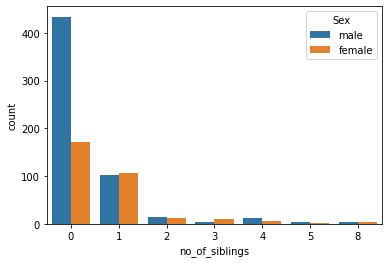

In [0]:
sns.countplot(x='no_of_siblings',hue='Sex',data=data)

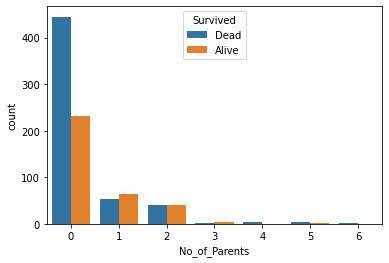

In [0]:
sns.countplot(x='No_of_Parents',hue='Survived',data=data)

In [0]:
data['Age']=pd.cut(data['Age'],bins=[0,25,50,75,100],labels=['Children','Youth','Adult','old'])

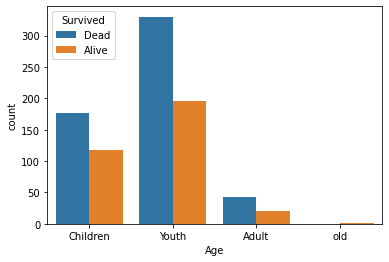

In [0]:
sns.countplot(x='Age',hue='Survived',data=data)

In [0]:
data.groupby(['Pclass','Survived'])[['Fare']].agg(['max','mean','count','sum']).reset_index()

Pclass Survived      Fare                             
                        max       mean count         sum
0      1    Alive  512.3292  95.840984   134  12842.6919
1      1     Dead  263.0000  64.684008    80   5174.7206
2      2    Alive   65.0000  22.055700    87   1918.8459
3      2     Dead   73.5000  19.412328    97   1882.9958
4      3    Alive   56.4958  13.694887   119   1629.6916
5      3     Dead   69.5500  13.669364   372   5085.0035

In [0]:
round(data['Fare'].sum(),2) ###total revenue

28533.95

In [0]:
data.groupby(['Embarked','Survived']).count()

Pclass  Sex  Age  no_of_siblings  No_of_Parents  Fare
Embarked Survived                                                       
C        Alive         93   93   90              93             93    93
         Dead          75   75   75              75             75    75
Q        Alive         30   30   30              30             30    30
         Dead          47   47   47              47             47    47
S        Alive        217  217  213             217            217   217
         Dead         427  427  427             427            427   427

In [0]:
data2=pd.concat([train,test],axis=0)

In [0]:
data2.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [0]:
##exploring correlation

In [0]:
##Survived is highly dependant on Fare

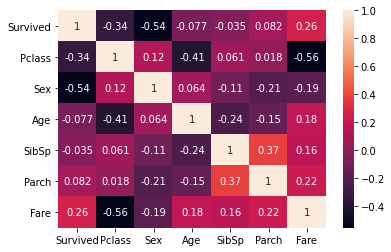

In [0]:
sns.heatmap(data2.corr(),annot=True)

In [0]:
data2['Sex']=data2['Sex'].map({'male':1,'female':0})

In [0]:
dummy=pd.get_dummies(data2['Embarked'],drop_first=True)

In [0]:
ml_data=pd.concat([data2,dummy],axis=1)

In [0]:
ml_data['Age'].fillna(ml_data['Age'].mean(),inplace=True)

In [0]:
ml_data['Age']=round(ml_data['Age'],0)

In [0]:
ml_data.dropna(inplace=True)

In [0]:
ml_data.shape

(889, 10)

In [0]:
data2.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lm=LogisticRegression()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x=ml_data.drop(['Survived'],axis=1)
y=ml_data['Survived']


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [0]:
lm.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred=lm.predict(x_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       161
         1.0       0.78      0.71      0.74       106

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [0]:
print(confusion_matrix(y_test,pred))

[[140  21]
 [ 31  75]]


In [0]:
pred_df=pd.DataFrame(pred)
pred_df.head(15)

,0
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,1.0


In [0]:
y_test_df=pd.DataFrame(y_test)
y_test_df.head(15)

,Survived
97,1.0
269,1.0
346,1.0
703,0.0
263,0.0
467,0.0
27,0.0
336,0.0
71,0.0
730,1.0


In [0]:
type(pred_df)

pandas.core.frame.DataFrame

In [0]:
type(y_test_df)

pandas.core.frame.DataFrame

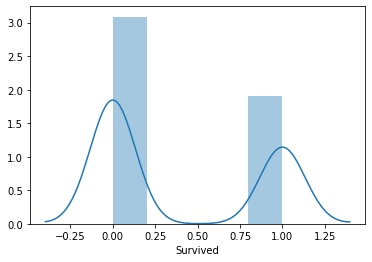

In [0]:
sns.distplot(ml_data['Survived'])